<a href="https://colab.research.google.com/github/Tiru-Kaggundi/Trade_Stuff/blob/main/CBAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# Read in the data from the Excel sheet
file_path = '/content/drive/MyDrive/CBAM/CBAM_DATA_V3.xlsx'
data = pd.read_excel(file_path, sheet_name='data')

In [4]:
data.head()

,Country,per_capita_emissions_2019,cumulative_emissions_2020,GDP,GDP_PC
0,Afghanistan,0.293401,4.080106e+09,18904490263,501
1,Albania,1.721533,9.581900e+09,15401830754,5396
2,Algeria,4.203331,1.011169e+11,15401830754,4022
3,Andorra,6.285722,2.514956e+08,3155065488,41328
4,Angola,0.674362,1.179320e+10,69309110146,2142


In [24]:

# Create a subset of the data that only includes the columns we want to plot
subset = data[['Country', 'per_capita_emissions_2019', 'cumulative_emissions_2020', 'GDP']]

# Define a function to calculate the size of the bubbles based on GDP
def calc_bubble_size(gdp):
    return np.log(gdp / np.pi)

# Create a new column in the subset that contains the bubble sizes
subset['Bubble Size'] = calc_bubble_size(subset['GDP'])

# Define the x-axis and y-axis variables
x = subset['per_capita_emissions_2019']
y = subset['cumulative_emissions_2020']


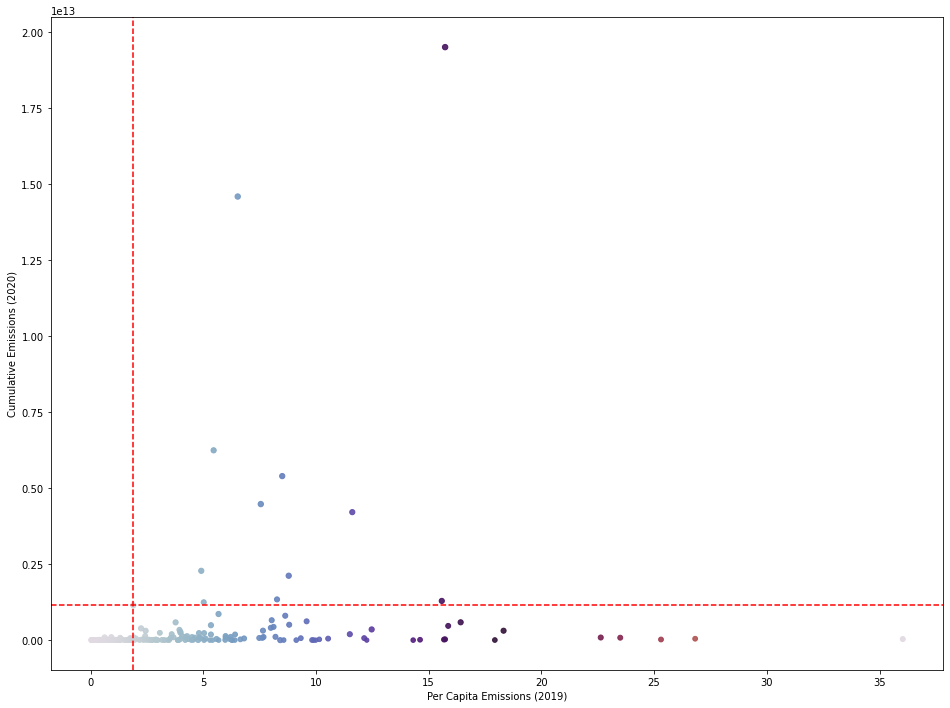

In [25]:

# Create the bubble plot
fig, ax = plt.subplots(figsize=(16, 12))
ax.scatter(x, y, s=subset['Bubble Size'], c=subset['per_capita_emissions_2019'], cmap='twilight', alpha=0.9)

# Add the horizontal line for India's cumulative emissions
india_cumulative_emissions = subset[subset['Country'] == 'India']['cumulative_emissions_2020'].values[0]
ax.axhline(india_cumulative_emissions, color='red', linestyle='--')

# Add the vertical line for India's per capita emissions
india_per_capita_emissions = subset[subset['Country'] == 'India']['per_capita_emissions_2019'].values[0]
ax.axvline(india_per_capita_emissions, color='red', linestyle='--')

# Set the x-axis and y-axis labels
ax.set_xlabel('Per Capita Emissions (2019)')
ax.set_ylabel('Cumulative Emissions (2020)')

# Show the plot
plt.show()

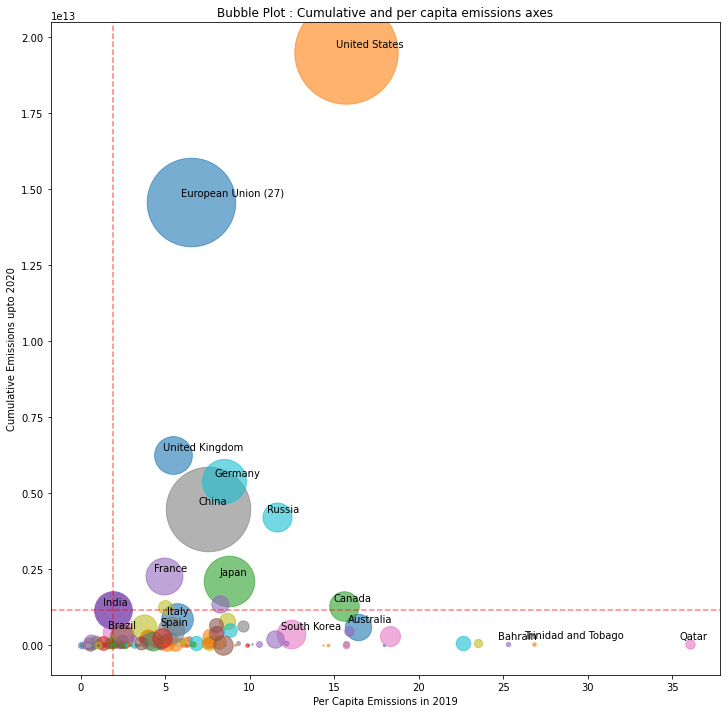

In [42]:
# Set up plot
fig, ax = plt.subplots(figsize=(12, 12))
fig.set_facecolor('white')

# Extract data for India
india = data[data['Country'] == 'India']
india_x = india['per_capita_emissions_2019'].iloc[0]
india_y = india['cumulative_emissions_2020'].iloc[0]

# Set up colors for each country
#colors = {'India': 'red', 'China': 'blue', 'United States': 'green', 'Russia': 'purple', 'Japan': 'orange'}

# Sort data by GDP in descending order and extract top 15 rows
top_15 = data.sort_values('GDP', ascending=False).head(15)

# Sort data by per capita emissions in descending order and extract top 3 rows
top_3_emittors = data.sort_values('per_capita_emissions_2019', ascending=False).head(3)

# Set up scaling factor for bubble size
scale_factor = 2000000000

# Plot bubbles for each country
for country in data['Country'].unique():
    subset = data[data['Country'] == country]
    x = subset['per_capita_emissions_2019']
    y = subset['cumulative_emissions_2020']
    size = subset['GDP'] / scale_factor
    alpha = 0.6
    if country == 'India':
        alpha = 1.0
    ax.scatter(x, y, s=size, alpha=alpha)

# Add horizontal and vertical lines for India
ax.axhline(y=india_y, linestyle='--', color='red', alpha=0.5)
ax.axvline(x=india_x, linestyle='--', color='red', alpha=0.5)


# Add text labels for top 20 countries by GDP
for i, row in top_15.iterrows():
    x = row['per_capita_emissions_2019']
    y = row['cumulative_emissions_2020']
    label = row['Country']
    ax.annotate(label, xy=(x, y), xytext=(-10, 5), textcoords='offset points', fontsize=10)

# Add text labels for top 3 countries by per capita emissions
for i, row in top_3_emittors.iterrows():
    x = row['per_capita_emissions_2019']
    y = row['cumulative_emissions_2020']
    label = row['Country']
    ax.annotate(label, xy=(x, y), xytext=(-10, 5), textcoords='offset points', fontsize=10)


# Set axis labels and title
ax.set_xlabel('Per Capita Emissions in 2019')
ax.set_ylabel('Cumulative Emissions upto 2020')
ax.set_title('Bubble Plot : Cumulative and per capita emissions axes')

plt.savefig('CBAM.png', bbox_inches='tight', dpi=300)
plt.show()